## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * X[0] + X[1]*5
y_pred2 = 40 * X[0] + X[1]*7.5

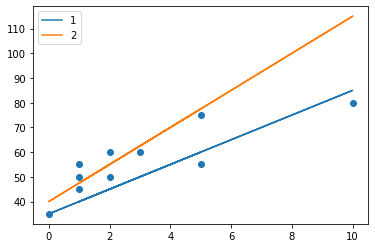

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

**Метод наименьших квадратов (МНК)**

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

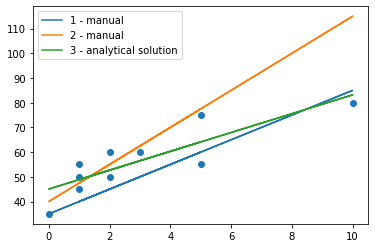

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.968750000000014)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.06250000000001, 45.291250000000005)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [48]:
n = X.shape[1]
alpha = 4.3e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(150):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        
print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.043        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.644 16.711], MSE = 3047.75
Iteration #10: W_new = [16.94178286  8.91204737], MSE = 444.46
Iteration #20: W_new = [24.83498863  7.48044731], MSE = 249.8
Iteration #30: W_new = [30.06351078  6.53233544], MSE = 156.46
Iteration #40: W_new = [33.62975107  5.88565275], MSE = 108.97
Iteration #50: W_new = [36.1275563   5.43271428], MSE = 83.47
Iteration #60: W_new = [37.91958656  5.10775722], MSE = 69.1
Iteration #70: W_new = [39.23359083  4.86948281], MSE = 60.64
Iteration #80: W_new = [40.21631535  4.69128087], MSE = 55.45
Iteration #90: W_new = [40.96457624  4.55559529], MSE = 52.15
Iteration #100: W_new = [41.54365643  4.45058803], MSE = 49.98
Iteration #110: W_new = [41.99847168  4.36811429], MSE = 48.51
Iteration #120: W_new = [42.36050597  4.30246496], MSE = 47.49
Iteration #130: W_new = [42.65221241  4.24956849], MSE = 46.77
Iteration #140: W_new = [42.88986214  4.2064

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [85]:
n = X.shape[1]
alpha = 4.3e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

stop_dif = 0

while stop_dif <= 0.01 and stop_dif != 0:
    y_pred = np.dot(W, X)
    stop_dif = err - stop_dif
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    
    W_pred = W
        
print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.043        
Initial weights = [1.  0.5] 

Iteration #149: W_new = [1.  0.5], MSE = 43.97
